# Assignment: Linear Models

## Question 0 

1. What makes a model "linear"? "Linear" in what?

A model is linear if it is able to study the relationship between two variables, such x and y. This is typically by means of regression where we try to find a linear equation that best predicts y with input x. In doing so, we find the correlation and also the strength of the linear relationship. 

2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.) There’s further explanation at the end of this document, if needed.

One-hot encoding changes all categorical variables into binary dummy variables. The coefficient of a dummy variable is the average change in y for categorical variables present. The change is calculated between the dependent variable and the reference baseline category that is ket constant. The intercept of the model is the expected value of the dependent variable where all the independent variables are zero.

3. Can linear regression be used for classification? Explain why, or why not.

No, linear regression uses quantitative variables instead of categorical variables as it measures a relationship that spans a range of values. 

4. If you have a high accuracy on training but low on testing, what might be the problem? It’s also possible you’ll see a pattern in the residuals.

The higher accuracy on training and low on testing means that there is over-fitting for the training model. This meant the regression analysis that was calculated for a certain dataset fit the training dataset too well that it deviated from generalizing the overall dataset, causing it to neglect the testing dataset. In this case, using a nonlinear model may benefit instead of linear where the model can get affected by the bottom average of the data. 

5. Review this page: Non-Linear with Linear What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables 
$x$?

One way is to engineer a more diverse and detailed set of features by including professional knowledge that can be used by a linear model. Another way is to use kernels that have locally-based function instead of global linear decision function. 

6.  What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

The intercept, Beta 0, is expected value of the dependent variable where all independent variable are 0. The slope coefficient, Beta 1, is the change in dependent variable over the independent variable that supports the linear regression. The coefficient for dummy variable is the average difference between the dependent variable from the reference category. 

## Question 1

Importing Packages

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading Dataset

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/DS3001/linearRegression/refs/heads/main/data/Q1_clean.csv")
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


#### 1) Compute the average prices and scores by Neighborhood ; which borough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighborhood .

Average price and score

In [20]:
df.groupby('Neighbourhood ')['Price'].mean()

Neighbourhood 
Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
Name: Price, dtype: float64

In [21]:
df.groupby('Neighbourhood ')['Review Scores Rating'].mean()

Neighbourhood 
Bronx            91.654378
Brooklyn         92.363497
Manhattan        91.801496
Queens           91.549057
Staten Island    90.843750
Name: Review Scores Rating, dtype: float64

Kernel Density Plot for price and log price

Text(0.5, 1.0, 'Kernel Density Plot of Price by Neighbourhood ')

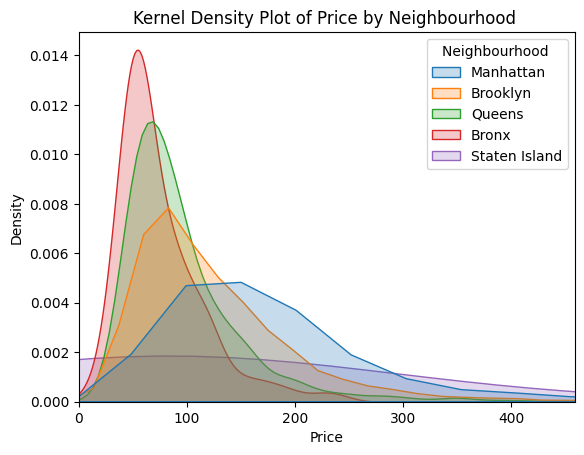

In [22]:
sns.kdeplot(df, x="Price", hue="Neighbourhood ", fill=True, common_norm=False)
plt.xlim(0, np.percentile(df['Price'], 98))
plt.title("Kernel Density Plot of Price by Neighbourhood ")

Text(0.5, 1.0, 'Kernel Density Plot of Log(Price) by Neighbourhood ')

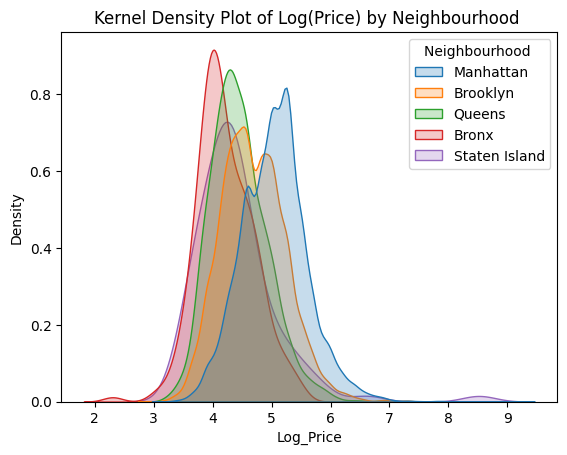

In [23]:
df['Log_Price'] = np.log(df['Price'])
sns.kdeplot(data=df, x="Log_Price", hue="Neighbourhood ", fill=True, common_norm=False)
plt.title("Kernel Density Plot of Log(Price) by Neighbourhood ")

#### 2) Regress price on Neighborhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [24]:
from sklearn.linear_model import LinearRegression

X = pd.get_dummies(df["Neighbourhood "], drop_first = False)
y = df['Price']

model = LinearRegression(fit_intercept = False)
model.fit(X,y)

coef = model.coef_
print(coef)

[ 75.2764977  127.74737834 183.66428632  96.8572327  146.16666667]


From observing the pattern, the coefficients that are displayed are the direct mean of the pice of neighborhood. For a regression without intercept, this means that a categorical variables with n categories yield the group means of the dependent variable. 

#### 3) Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [25]:
X = pd.get_dummies(df['Neighbourhood '], drop_first = True)
y = df['Price']

model = LinearRegression(fit_intercept=True)
model.fit(X,y)

intercept = model.intercept_
coef = model.coef_

print(intercept)
print(coef)

75.27649769585331
[ 52.47088065 108.38778863  21.58073501  70.89016897]


The intercept, 75.27, is the mean of the drop_first neighborhood, which is Bronx. This means the coefficients are yielded represents the difference between that drop_first mean and the rest of the neighorhood's mean because the dummy variable allows it to move the value by the exact difference to get to the mean. 

#### 4) Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighborhood . What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from pandas import read_csv, Series, DataFrame

X = pd.get_dummies(df[['Review Scores Rating', 'Neighbourhood ']], drop_first = True)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

model = LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE:", round(rmse,3))

coefs = Series(model.coef_, index=model.feature_names_in_)
print(coefs)

R^2: 0.072
RMSE: 121.49
Review Scores Rating              1.007598
Neighbourhood _Brooklyn          57.246732
Neighbourhood _Manhattan        113.129859
Neighbourhood _Queens            26.283642
Neighbourhood _Staten Island     82.074131
dtype: float64


The R^2 is 0.072. The RMSE is 121.49. The coefficient for Review Scores Rating is 1.0075. From reviewing the coefficient, the most expensive kind of property is the property in Manhattan. 

#### 5) Run a regression of Price on Review Scores Rating and Neighborhood and Property Type. What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [10]:
X = pd.get_dummies(df[['Review Scores Rating', 'Neighbourhood ', 'Property Type']], drop_first = True)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

model = LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE:", round(rmse,3))

coefs = Series(model.coef_, index=model.feature_names_in_)
print(coefs)

R^2: 0.086
RMSE: 120.568
Review Scores Rating             1.006896e+00
Neighbourhood _Brooklyn          6.461103e+01
Neighbourhood _Manhattan         1.255588e+02
Neighbourhood _Queens            3.166652e+01
Neighbourhood _Staten Island     7.462722e+01
Property Type_Bed & Breakfast   -3.274745e+01
Property Type_Boat               6.195455e+01
Property Type_Bungalow           5.628966e+01
Property Type_Cabin             -2.664535e-14
Property Type_Camper/RV         -2.254063e+01
Property Type_Castle            -4.018187e+01
Property Type_Chalet            -2.922726e+01
Property Type_Condominium        9.128475e+01
Property Type_Dorm              -4.821102e+01
Property Type_House              3.541865e+01
Property Type_Hut               -1.341405e+02
Property Type_Lighthouse        -9.023415e+01
Property Type_Loft               5.993960e+01
Property Type_Other              4.872083e+01
Property Type_Townhouse          3.856048e+01
Property Type_Treehouse         -7.609568e+01
Property 

The R^2 is 0.086. The RMSE is 120.568. The coefficient for Review Scores Rating is 1.0069. Based on the coefficients for property type, Condominium is the most expensive type of place to rent. 

#### 6) What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multiple linear regression works.

The coefficient on Review Scores Rating decreased a little from part 4 to 5. The idea of multiple linear regression is that it adds more complexity to the model, which makes it better at predicting the dependent variables. With the addition of property type, it provides a more nuance analysis that accounts for more variation in price that makes it better to predict. 

## Question 2

#### 1) Load cars_hw.csv. These data were really dirty, and I’ve already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly skewed variables that require a log or arcsinh transformation) Note this is different than normalizing: there is a text below that explains further. Clean the data however you think is most appropriate.

In [113]:
df2 = pd.read_csv('../data/cars_hw.csv')
df2.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


#### Removing Outliers 

In [114]:
df2 = df2.iloc[:, 1:]
num_cols = df2.select_dtypes(include=['number']).columns

def outliers(df2, cols): # function for removing outliers
    for col in cols:
        Q1 = df2[col].quantile(0.25)
        Q3 = df2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df2 = df2[(df2[col] >= lower) & (df2[col] <= upper)]
    return df2

df2 = outliers(df2, num_cols)

#### Adjusting Skewness

In [115]:
from scipy.stats import skew

skew_values = skew(df2[num_cols].dropna(), axis=0, nan_policy='omit')
skews = pd.Series(skew_values, index=num_cols).sort_values(ascending=False)

# highly skewed columns 
skewed_cols = skews[abs(skews) > 1].index

for col in skewed_cols:
    df2[col] = np.log(df2[col])

/tmp/ipykernel_946/1442949080.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_values = skew(df2[num_cols].dropna(), axis=0, nan_policy='omit')


#### 2) Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

#### Summarize Price

In [116]:
print(df2['Price'].describe())

count    8.780000e+02
mean     6.693200e+05
std      2.531389e+05
min      2.370000e+05
25%      4.582500e+05
50%      6.390000e+05
75%      8.262500e+05
max      1.464000e+06
Name: Price, dtype: float64


#### Kernel Density Plot

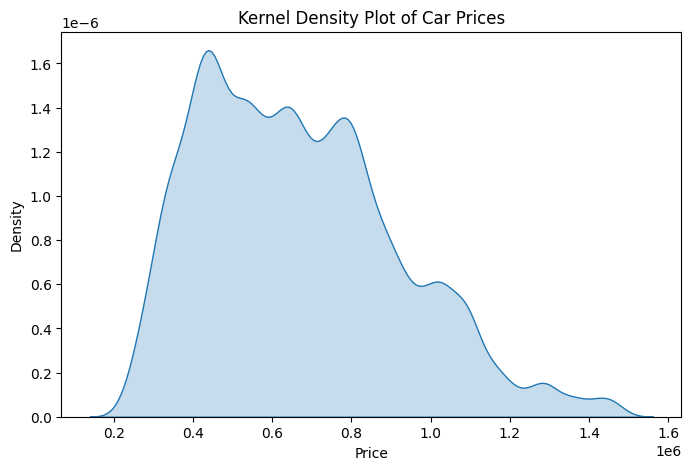

In [117]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df2['Price'], fill=True, bw_adjust=0.5)
plt.title("Kernel Density Plot of Car Prices")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

#### Summarize Price by Make

In [118]:
price_make = df2.groupby('Make')['Price'].describe()
print(price_make)

               count          mean            std        min        25%  \
Make                                                                      
Chevrolet        6.0  4.535000e+05  246606.366503   267000.0   288500.0   
Datsun           3.0  2.896667e+05   10503.967504   279000.0   284500.0   
Ford            52.0  7.211731e+05  140927.699605   290000.0   635000.0   
Honda           69.0  7.964928e+05  256112.660366   316000.0   580000.0   
Hyundai        304.0  6.884375e+05  273012.825123   248000.0   484750.0   
Jeep             1.0  1.290000e+06            NaN  1290000.0  1290000.0   
Kia              1.0  1.369000e+06            NaN  1369000.0  1369000.0   
Mahindra         2.0  1.177000e+06  141421.356237  1077000.0  1127000.0   
Maruti Suzuki  282.0  5.840355e+05  212976.780561   237000.0   411250.0   
Nissan           4.0  8.842500e+05  289559.867155   475000.0   782500.0   
Renault         55.0  6.530364e+05  236652.813651   287000.0   454500.0   
Skoda            4.0  6.8

#### Kernel Density Plot

/tmp/ipykernel_946/3581089637.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df2, x='Price', hue='Make', fill=True, bw_adjust=0.7)


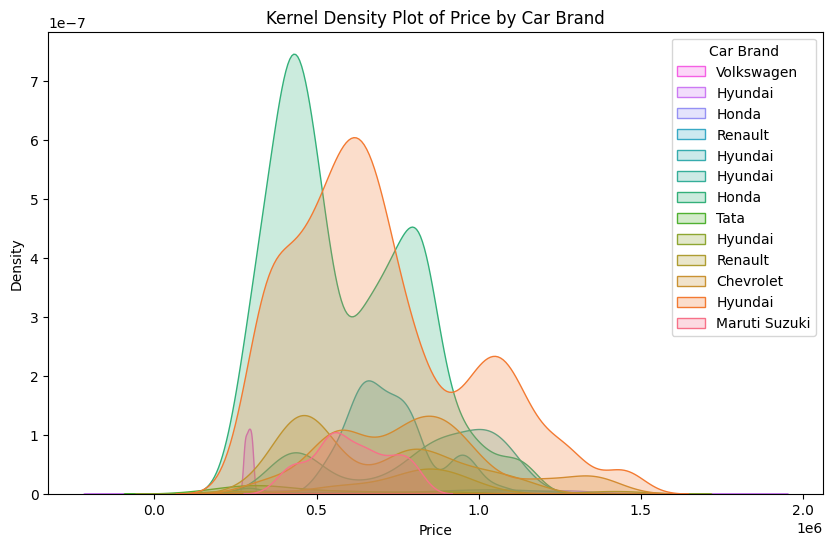

In [119]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df2, x='Price', hue='Make', fill=True, bw_adjust=0.7)
plt.title("Kernel Density Plot of Price by Car Brand")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend(df2['Make'], title="Car Brand")
plt.show()

#### Most Expensive Car Brand

In [120]:
avg_price = df2.groupby('Make')['Price'].mean().sort_values(ascending=False)
print(avg_price)

Make
Kia              1.369000e+06
Jeep             1.290000e+06
Mahindra         1.177000e+06
Nissan           8.842500e+05
Tata             8.024375e+05
Toyota           8.003400e+05
Honda            7.964928e+05
Ford             7.211731e+05
Hyundai          6.884375e+05
Skoda            6.847500e+05
Renault          6.530364e+05
Volkswagen       6.058276e+05
Maruti Suzuki    5.840355e+05
Chevrolet        4.535000e+05
Datsun           2.896667e+05
Name: Price, dtype: float64


Kia is the most expensive car brand based on the average price. Prices in general span from $30,000 to $140,000. 

#### 3) Split the data into an 80% training set and a 20% testing set.

In [121]:
X = df2.drop(columns=['Price'])  
y = df2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

#### 4)  Make a model where you regress price on the numeric variables alone; what is the R^2 and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the R^2 and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the R^2 and RMSE on the test set? Does the joint model perform better or worse, and by home much?

#### 1st Model

In [122]:
# Identifying numeric columns 
X_train1 = X_train.select_dtypes(include=['number'])
X_test1 = X_test.select_dtypes(include=['number'])

model = LinearRegression(fit_intercept=True)
model.fit(X_train1,y_train)

y_pred = model.predict(X_test1)

r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE:", round(rmse,3))

R^2: 0.407
RMSE: 191845.584


#### 2nd Model

In [123]:
# Dummy variables for Categorical
X_train2 = X_train.select_dtypes(include=['object'])
X_test2 = X_test.select_dtypes(include=['object'])
X_train_col = X_train.select_dtypes(include=['object']).columns 
X_test_col = X_test.select_dtypes(include=['object']).columns 

X_train2 = pd.get_dummies(X_train2[X_train_col], drop_first = True)
X_test2 = pd.get_dummies(X_test2[X_test_col], drop_first = True)

X_test2 = X_test2.reindex(columns=X_train2.columns, fill_value=0)

model = LinearRegression(fit_intercept=True)
model.fit(X_train2,y_train)

y_pred = model.predict(X_test2)

r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE:", round(rmse,3))

R^2: 0.537
RMSE: 169473.874


#### 3rd Model

In [124]:
#Both numerical and categorical 

X_train3 = pd.concat([X_train1, X_train2], axis=1)
X_test3 = pd.concat([X_test1, X_test2], axis=1)

X_test3 = X_test3.reindex(columns=X_train3.columns, fill_value=0)

model = LinearRegression(fit_intercept=True)
model.fit(X_train3,y_train)

y_pred = model.predict(X_test3)

r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE:", round(rmse,3))

R^2: 0.736
RMSE: 128112.627


The joint model performed better than both previous two models. In R^2, it was 0.329 greater than the first model and 0.202 greater than the second one. 

#### 5) Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you’re using in the regression. As you increase the degree of the expansion, how do the R^2 and RMSE change? At what point does R^2 go negative on the test set? For your best model with expanded features, what is the R^2 and RMSE? How does it compare to your best model from part 4?

In [125]:
from sklearn.preprocessing import PolynomialFeatures

test = []

for degree in range(1, 6):  # Degrees from 1 to 5
    Polynomial = PolynomialFeatures(degree=degree, include_bias=False)
    X_train4 = X_train.select_dtypes(include=['number'])
    X_test4 = X_test.select_dtypes(include=['number'])
    X_train4 = Polynomial.fit_transform(X_train4)
    X_test4 = Polynomial.transform(X_test4)  

    model = LinearRegression()
    model.fit(X_train4, y_train)

    y_train_pred = model.predict(X_train4)
    y_test_pred= model.predict(X_test4)

    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred) ** 0.5

    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5

    test.append((degree, r2_train, rmse_train, r2_test, rmse_test))

for result in test:
    print(f"Degree: {result[0]}, R² Train: {result[1]:.3f}, RMSE Train: {result[2]:.3f}, R² Test: {result[3]:.3f}, RMSE Test: {result[4]:.3f}")

Degree: 1, R² Train: 0.341, RMSE Train: 206130.575, R² Test: 0.407, RMSE Test: 191845.584
Degree: 2, R² Train: 0.353, RMSE Train: 204295.409, R² Test: 0.420, RMSE Test: 189745.738
Degree: 3, R² Train: 0.354, RMSE Train: 204136.387, R² Test: 0.413, RMSE Test: 190804.729
Degree: 4, R² Train: 0.355, RMSE Train: 203896.769, R² Test: 0.406, RMSE Test: 191953.862
Degree: 5, R² Train: 0.355, RMSE Train: 203956.181, R² Test: 0.407, RMSE Test: 191830.259


As the degrees increase, the R^2 for both training and testing increase a little bit and then continued on decreasing after degree 2. RMSE for training went downwards, while the RMSE for testing goes up and down. R^2 started going negative after degree 2 on the test set. For the best model , the R^2 train is 0.353, RMSE train is 204295.409, R^2 test is 0.420, and RMSE test is 189745.738. In comparison with part 4, best model still does not perform as well as the joint model. 

#### 6) For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

#### Scatterplot

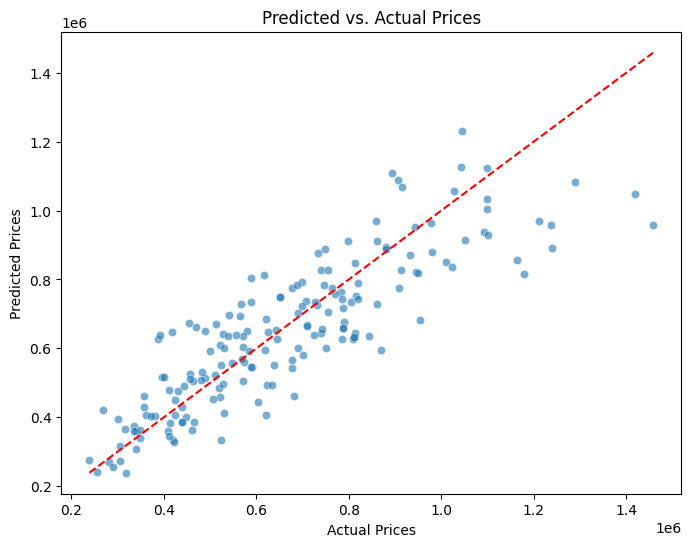

In [126]:
# third model (joint model)
X_train3 = pd.concat([X_train1, X_train2], axis=1)
X_test3 = pd.concat([X_test1, X_test2], axis=1)

X_test3 = X_test3.reindex(columns=X_train3.columns, fill_value=0)

model = LinearRegression(fit_intercept=True)
model.fit(X_train3,y_train)

y_pred = model.predict(X_test3)

# Diagonal Line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual Prices")
plt.show()

#### Residual and Error

In [83]:
residual = y_test - y_pred
print(residual)

915    -31348.702849
638     31071.019123
143    305789.523802
379      5045.450786
686    272477.746893
           ...      
855    -72116.002443
814    178224.451607
501    186935.005810
474     45258.921288
348   -192395.949876
Name: Price, Length: 176, dtype: float64


#### Kernel Density plot

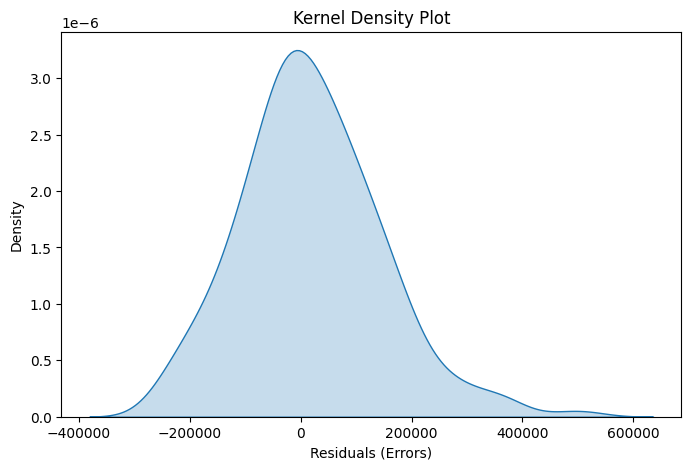

In [127]:
plt.figure(figsize=(8, 5))
sns.kdeplot(residual, fill=True)
plt.xlabel("Residuals (Errors)")
plt.ylabel("Density")
plt.title("Kernel Density Plot")
plt.show()

For the scatterplot, the predicted and actual values have just a little bit of distance from the diagonal, but the there is strength when it comes to both of them following the same linear direction. For the kernel density plot, we can see a bell-shaped distribution that is roughly perfect with the bend on the right side. The mean is centered at around zero, but the skewness is the reason why the graph is not perfectly normal.The weakness lies on the fact that there is a high variability in error from observing the variance of the graph.

## Question 3

#### 1) Find a dataset on a topic you’re interested in. Some easy options are data.gov, kaggle.com, and data.world.


In [102]:
df3 = pd.read_csv('../data/screentime_analysis.csv')

#### 2) Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.

#### Cleaning Data

In [103]:
df3 = df3.dropna()
df3 = df3.drop(columns=['Date'])  
df3.head()

,App,Usage (minutes),Notifications,Times Opened
0,Instagram,81,24,57
1,Instagram,90,30,53
2,Instagram,112,33,17
3,Instagram,82,11,38
4,Instagram,59,47,16


#### Describe Dataset

In [104]:
df3.describe()

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


#### Summarize by App

In [105]:
df3.groupby('App')['Usage (minutes)'].mean()

App
8 Ball Pool    18.08
Facebook       33.68
Instagram      75.92
LinkedIn       15.60
Netflix        72.76
Safari         10.80
WhatsApp       48.16
X              27.00
Name: Usage (minutes), dtype: float64

#### Kernel Density Plot for Usage and App

Text(0.5, 1.0, 'Kernel Density Plot of Usage (minutes) by App ')

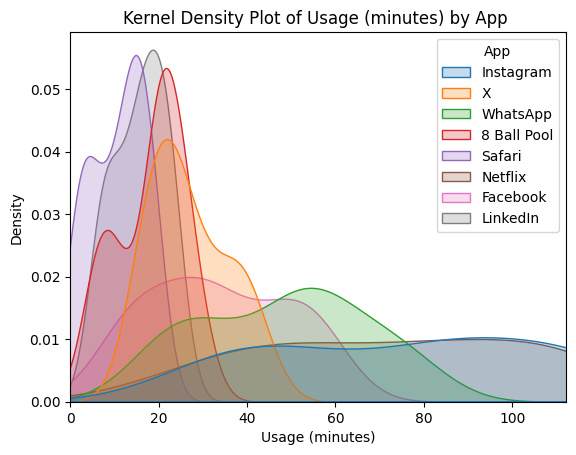

In [106]:
sns.kdeplot(df3, x="Usage (minutes)", hue="App", fill=True, common_norm=False)
plt.xlim(0, np.percentile(df3['Usage (minutes)'], 98))
plt.title("Kernel Density Plot of Usage (minutes) by App ")

#### 3) Split the sample into an ~80% training set and a ~20% test set.

In [129]:
X = df3.drop(columns=['Usage (minutes)'])  
y = df3['Usage (minutes)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

#### 4) Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the RMSE on the test set.

#### 1st Model 

In [130]:
# Identifying numeric columns 
X_train1 = X_train.select_dtypes(include=['number'])
X_test1 = X_test.select_dtypes(include=['number'])

model = LinearRegression(fit_intercept=True)
model.fit(X_train1,y_train)

y_pred = model.predict(X_test1)

r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE:", round(rmse,3))

R^2: 0.111
RMSE: 24.064


2nd Model

In [131]:
# Model for categorical Variables

X_train2 = X_train.select_dtypes(include=['object'])
X_test2 = X_test.select_dtypes(include=['object'])
X_train_col = X_train.select_dtypes(include=['object']).columns 
X_test_col = X_test.select_dtypes(include=['object']).columns 

X_train2 = pd.get_dummies(X_train2[X_train_col], drop_first = True)
X_test2 = pd.get_dummies(X_test2[X_test_col], drop_first = True)

X_test2 = X_test2.reindex(columns=X_train2.columns, fill_value=0)

model = LinearRegression(fit_intercept=True)
model.fit(X_train2,y_train)

y_pred = model.predict(X_test2)

r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE:", round(rmse,3))

R^2: 0.692
RMSE: 14.17


#### 3rd Model

In [132]:
# Joint Model

X_train3 = pd.concat([X_train1, X_train2], axis=1)
X_test3 = pd.concat([X_test1, X_test2], axis=1)

X_test3 = X_test3.reindex(columns=X_train3.columns, fill_value=0)

model = LinearRegression(fit_intercept=True)
model.fit(X_train3,y_train)

y_pred = model.predict(X_test3)

r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE:", round(rmse,3))

R^2: 0.692
RMSE: 14.166


#### Polynomial Model

In [133]:
test = []

for degree in range(1, 6):  # Degrees from 1 to 5
    Polynomial = PolynomialFeatures(degree=degree, include_bias=False)
    X_train4 = X_train.select_dtypes(include=['number'])
    X_test4 = X_test.select_dtypes(include=['number'])
    X_train4 = Polynomial.fit_transform(X_train4)
    X_test4 = Polynomial.transform(X_test4)  

    model = LinearRegression()
    model.fit(X_train4, y_train)

    y_train_pred = model.predict(X_train4)
    y_test_pred= model.predict(X_test4)

    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred) ** 0.5

    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5

    test.append((degree, r2_train, rmse_train, r2_test, rmse_test))

for result in test:
    print(f"Degree: {result[0]}, R² Train: {result[1]:.3f}, RMSE Train: {result[2]:.3f}, R² Test: {result[3]:.3f}, RMSE Test: {result[4]:.3f}")

Degree: 1, R² Train: 0.099, RMSE Train: 28.951, R² Test: 0.111, RMSE Test: 24.064
Degree: 2, R² Train: 0.118, RMSE Train: 28.640, R² Test: 0.082, RMSE Test: 24.456
Degree: 3, R² Train: 0.157, RMSE Train: 28.006, R² Test: 0.186, RMSE Test: 23.030
Degree: 4, R² Train: 0.262, RMSE Train: 26.189, R² Test: 0.067, RMSE Test: 24.651
Degree: 5, R² Train: 0.284, RMSE Train: 25.810, R² Test: -0.008, RMSE Test: 25.625


#### Which model performed the best, and why?

From evaluating the R^2 and RMSE, the third model (joint model with numerical and categorical) performed the best with a R^2 of 0.692 and RMSE of 14.166. This result is better than the first model and just a little bit better than second model with R^2 being the same but RMSE smaller for the third model. 

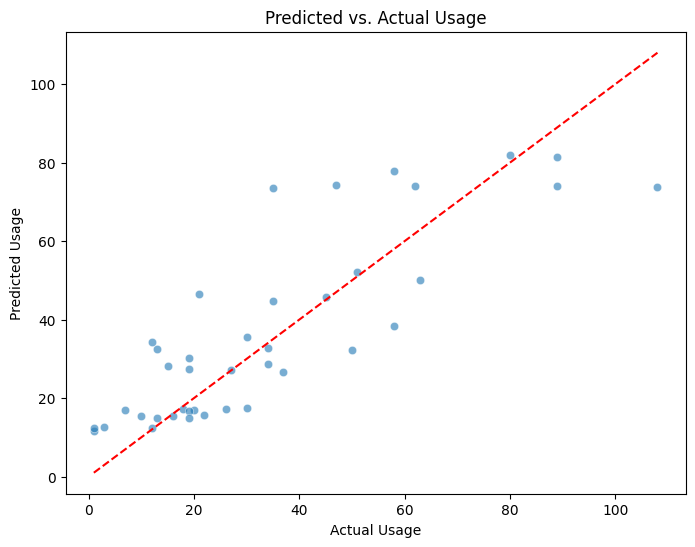

In [135]:
X_train3 = pd.concat([X_train1, X_train2], axis=1)
X_test3 = pd.concat([X_test1, X_test2], axis=1)

X_test3 = X_test3.reindex(columns=X_train3.columns, fill_value=0)

model = LinearRegression(fit_intercept=True)
model.fit(X_train3,y_train)

y_pred = model.predict(X_test3)

# Diagonal Line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Usage")
plt.ylabel("Predicted Usage")
plt.title("Predicted vs. Actual Usage")
plt.show()

Even though it is the best model, the model itself has some flaws as the the points of actual usage and predicted usage are not directly on the diagonal. But it does follow a roughly similar linear trend. 

#### 6) What did you learn?

In this lab, I learned the importance of train and test split. Without this function, there is no other effective approach that can yield metrics that indicate how well your model performed. It is the best way to learn which model fits best for the overall dataset with R^s and RMSE evaluation in order for us to make proper predictions. Secondly, I also learned the different ways of visualizing performance, such as the diagonal on the scatterplot and the density plot for residual and error. I believe it is a very comprehensive way of knowing how well a model fits the dataset with the use of graphing. 